In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('12.08.2024').sheet1

In [ ]:
rows = worksheet.get_all_values()

In [ ]:
df = pd.DataFrame(rows[1:], columns=rows[0])
df=df.astype({'x':'float'})
df=df.astype({'y':'float'})
df
x=df[['x']].values
y=df[['y']].values
df.head()

,x,y
0,1.0,3.0
1,2.0,5.0
2,3.0,7.0
3,4.0,9.0
4,5.0,11.0


In [ ]:
df.head(21)

,x,y
0,1.0,3.0
1,2.0,5.0
2,3.0,7.0
3,4.0,9.0
4,5.0,11.0
5,6.0,13.0
6,7.0,15.0
7,8.0,17.0
8,9.0,19.0
9,10.0,21.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=33)

In [ ]:

import numpy as np
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
mn.fit(x_train)
x_train1=mn.transform(x_train)


In [ ]:
ai_mind=Sequential([
    Dense(8,activation = 'relu',input_shape=[1]),
    Dense(10,activation='relu'),
    Dense(1)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step - loss: 1.1643e-05
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0391
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 1.4364e-05
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.7339e-08
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5.5799e-09
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.7354e-09
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 3.1358e-09
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 2.5790e-09
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2.0876e-09
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.6905e-09
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.2761e-09
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.9632e-10
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 7.6469e-10
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 5.7127e-10
Epoch 15/1000
1/1 

<Axes: >

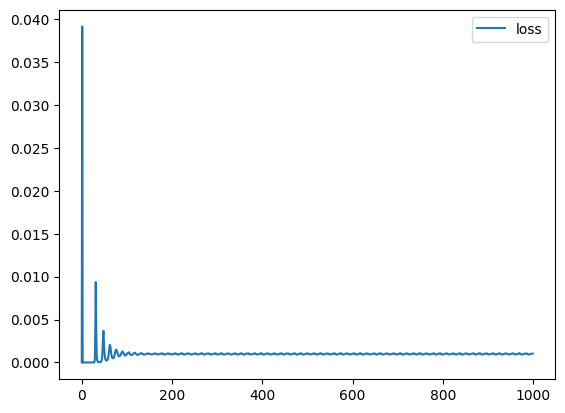

In [ ]:
ai_mind.compile(optimizer='rmsprop',loss='mse')
ai_mind.fit(x_train1,y_train,epochs=1000)

loss_df=pd.DataFrame(ai_mind.history.history)
loss_df.plot()


In [ ]:
loss=ai_mind.evaluate(x_test,y_test, verbose=1)
print(f"Test loss: {loss}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 187842.4062
Test loss: 187842.40625


In [ ]:
new_input=np.array([[20]],dtype=np.float32)
new_input_scaled=mn.transform(new_input)
prediction=ai_mind.predict(new_input_scaled)
print(f'Predicted Value for the input {new_input[0][0]}: {prediction[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Value for the input 20.0: 41.04167556762695


In [ ]:
from sklearn.metrics import mean_squared_error
y_pred = ai_mind.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Root Mean Squared Error on Test Set: {rmse}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Root Mean Squared Error on Test Set: 433.4079180178574


In [ ]:
new_x=np.array([5,0])

predict_output=model.predict(new_x)
print(predict_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[-1.3270519 ]
 [ 0.02824686]]
